In [74]:
# EEG Biomarkers in Alzheimer's Disease

# Visalisation Code for Literature Review
# Author: Sophie Becking
# MSc Neurobiology (Track: Physiology of Synapses and Networks) 
# Litearture Thesis Project, University of Amsterdam
# Date: 11-06-2025

In [75]:
## IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import plotly.express as px
from collections import Counter


In [76]:
## DATA 

studies = [
    {'Study': 'Knott et al. (2000)', 'Intervention': 'Nicotine', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9.5, 'Bands': 'Delta, Theta, Alpha, Beta, Alpha-1/2, Beta-1/2', 'Description': 'Absolute/relative power, mean frequency, slow/fast alpha/beta', 'Delta': -1, 'Theta': -1, 'Alpha': 1, 'Beta': 1},
    {'Study': 'Scheltens et al. (2018)', 'Intervention': 'PQ912', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power & Connectivity', 'CASP': 10, 'Bands': 'Alpha, Theta', 'Description': 'Mean peak freq, global relative power, PLI, network topology', 'Delta': 0, 'Theta': -1, 'Alpha': 0, 'Beta': 0},
    {'Study': 'Benussi et al. (2022)', 'Intervention': 'Y-tACS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power', 'CASP': 10, 'Bands': 'Theta, Alpha, Beta, Gamma', 'Description': 'Band power', 'Delta': 0, 'Theta': -1, 'Alpha': 0, 'Beta': 1, 'Gamma': 1},
    {'Study': 'Andrade et al. (2022)', 'Intervention': 'tDCS+CS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power & Connectivity', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Band power, coherence (synchrony between electrodes)', 'Delta': 1, 'Theta': 1, 'Alpha': 1, 'Beta': 1},
    {'Study': 'Gangemi et al. (2021)', 'Intervention': 'tDCS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Alpha, Beta, Theta', 'Description': 'Band activity', 'Delta': 0, 'Theta': 0, 'Alpha': -1, 'Beta': -1},
    {'Study': 'Vecchio et al. (2022)', 'Intervention': 'rTMS-COG', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power', 'CASP': 8, 'Bands': 'Delta, Theta, Alpha-1/2, Beta-1/2, Gamma', 'Description': 'SW index per band', 'Delta': -1, 'Theta': 0, 'Alpha': 1, 'Beta': -1, 'Gamma': 0},
    {'Study': 'Briels et al. (2020)', 'Intervention': 'PQ912', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power & Connectivity', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Global relative power, AEC-c, PLI', 'Delta': 0, 'Theta': 0, 'Alpha': 1, 'Beta': 0},
    {'Study': 'Scheltens et al. (2012)', 'Intervention': 'Souvenaid', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power & Connectivity', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta, Gamma', 'Description': 'Relative/absolute power, peak freq, PLI', 'Delta': 1, 'Theta': 0, 'Alpha': 0, 'Beta': 0, 'Gamma': 0},
    {'Study': 'Babiloni et al. (2009)', 'Intervention': 'Ibuprofen', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9.5, 'Bands': 'Delta, Theta, Alpha-1/2, Beta-1/2', 'Description': 'Power density, LORETA', 'Delta': -1, 'Theta': 0, 'Alpha': 0, 'Beta': 0},
    {'Study': 'de Waal et al. (2014)', 'Intervention': 'Souvenaid', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Connectivity', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta, Gamma', 'Description': 'PLI, network integration (gamma, lambda)', 'Delta': 0, 'Theta': 0, 'Alpha': 0, 'Beta': 1},
    {'Study': 'Mohr et al. (1995)', 'Intervention': 'Cycloserine', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha-1/2, Beta', 'Description': 'Absolute/relative power, entropy maps', 'Delta': 0, 'Theta': 0, 'Alpha': 0, 'Beta': 0},
    {'Study': 'Saletu et al. (1992)', 'Intervention': 'Denbufylline', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 8.5, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Total, absolute/relative power, centroids', 'Delta': -1, 'Theta': 0, 'Alpha': 0, 'Beta': 0},
    {'Study': 'Grossmann et al. (1990)', 'Intervention': 'Naftidrofuryl', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Relative power, dominant frequency, alpha/theta ratio', 'Delta': -1, 'Theta': 1, 'Alpha': 1, 'Beta': -1},
    {'Study': 'Alvarez et al. (1999)', 'Intervention': 'Citicoline', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9.5, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Relative power', 'Delta': -1, 'Theta': 1, 'Alpha': 0, 'Beta': 1},
    {'Study': 'Almkvist et al. (2001)', 'Intervention': 'Tacrine', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Absolute alpha/theta ratio, spectral analysis', 'Delta': -1, 'Theta': -1, 'Alpha': 1, 'Beta': 1},
    {'Study': 'Saletu et al. (1995)', 'Intervention': 'Nicergoline', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Absolute/relative power, centroids', 'Delta': -1, 'Theta': -1, 'Alpha': 1, 'Beta': 1},
    {'Study': 'Hoy et al. (2023)', 'Intervention': 'iTBS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Connectivity', 'CASP': 8, 'Bands': 'Theta, Gamma', 'Description': 'wPLI (functional connectivity)', 'Delta': 0, 'Theta': 0, 'Alpha': 0, 'Beta': 0, 'Gamma': 1},
    {'Study': 'Heiss et al. (1994)', 'Intervention': 'Pyritinol + CT', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 6, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Global, absolute/relative power', 'Delta': 0, 'Theta': 1, 'Alpha': 0, 'Beta': 0},
    {'Study': 'Engel et al. (1992)', 'Intervention': 'Phosphatidylserine', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta-1/2', 'Description': 'Absolute power', 'Delta': 0, 'Theta': -1, 'Alpha': -1, 'Beta': -1},
    {'Study': 'Minthon et al. (1993)', 'Intervention': 'THA', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Absolute/relative power', 'Delta': -1, 'Theta': -1, 'Alpha': -1, 'Beta': -1},
    {'Study': 'Koch et al. (2018)', 'Intervention': 'rTMS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta, Gamma', 'Description': 'Mean spectral power', 'Delta': 0, 'Theta': 0, 'Alpha': 0, 'Beta': 0, 'Gamma': 0},
    {'Study': 'Cheng et al. (2024)', 'Intervention': 'Physical exercise + CT', 'Intervention_Type': 'Other', 'EEG_Measure': 'Power', 'CASP': 8, 'Bands': 'Alpha', 'Description': 'Band power', 'Delta': 0, 'Theta': 0, 'Alpha': 1, 'Beta': 0},
    {'Study': 'Koch et al. (2023)', 'Intervention': 'Precuneus rTMS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Power', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta, Gamma', 'Description': 'Band power', 'Delta': 0, 'Theta': -1, 'Alpha': 0, 'Beta': 0, 'Gamma': 1},
    {'Study': 'Vijverberg et al. (2024)', 'Intervention': 'CT1812', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power', 'CASP': 10, 'Bands': 'Delta, Theta, Alpha, Beta', 'Description': 'Band power', 'Delta': 0, 'Theta': -1, 'Alpha': 1, 'Beta': 0},
    {'Study': 'Gangemi et al. (2021) - long-term', 'Intervention': 'tDCS', 'Intervention_Type': 'Brain Stimulation', 'EEG_Measure': 'Functional Connectivity', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma', 'Description': 'Small World (SW) graph approach, eLORETA', 'Delta': -1, 'Theta': 0, 'Alpha': 1, 'Beta': -1, 'Gamma': 0},
    {'Study': 'Babiloni et al. (2006)', 'Intervention': 'Ibuprofen', 'Intervention_Type': 'Medication', 'EEG_Measure': 'Power & Connectivity', 'CASP': 9, 'Bands': 'Delta, Theta, Alpha, Beta, Gamma', 'Description': 'Power density, LORETA, PLI, graph theory', 'Delta': 0, 'Theta': 0, 'Alpha': 0, 'Beta': 1, 'Gamma': 1}
]

# Convert studies to DataFrame
df = pd.DataFrame(studies)

# Melt the frequency bands into long format
df_long = pd.melt(df, 
                  id_vars=['Study', 'Intervention', 'Intervention_Type', 'EEG_Measure', 'CASP', 'Bands', 'Description'],
                  value_vars=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'],
                  var_name='Frequency_Band',
                  value_name='Effect')

# Remove rows where Effect is NaN
df_long = df_long.dropna(subset=['Effect'])

# Save to CSV
df_long.to_csv('studies_long_format.csv', index=False)

# Print first few rows to verify
print("First few rows of the long format data:")
print(df_long.head())

First few rows of the long format data:
                     Study Intervention  Intervention_Type  \
0      Knott et al. (2000)     Nicotine         Medication   
1  Scheltens et al. (2018)        PQ912         Medication   
2    Benussi et al. (2022)       Y-tACS  Brain Stimulation   
3    Andrade et al. (2022)      tDCS+CS  Brain Stimulation   
4    Gangemi et al. (2021)         tDCS  Brain Stimulation   

            EEG_Measure  CASP                                           Bands  \
0                 Power   9.5  Delta, Theta, Alpha, Beta, Alpha-1/2, Beta-1/2   
1  Power & Connectivity  10.0                                    Alpha, Theta   
2                 Power  10.0                       Theta, Alpha, Beta, Gamma   
3  Power & Connectivity  10.0                       Delta, Theta, Alpha, Beta   
4                 Power   9.0                              Alpha, Beta, Theta   

                                         Description Frequency_Band  Effect  
0  Absolute/relative p

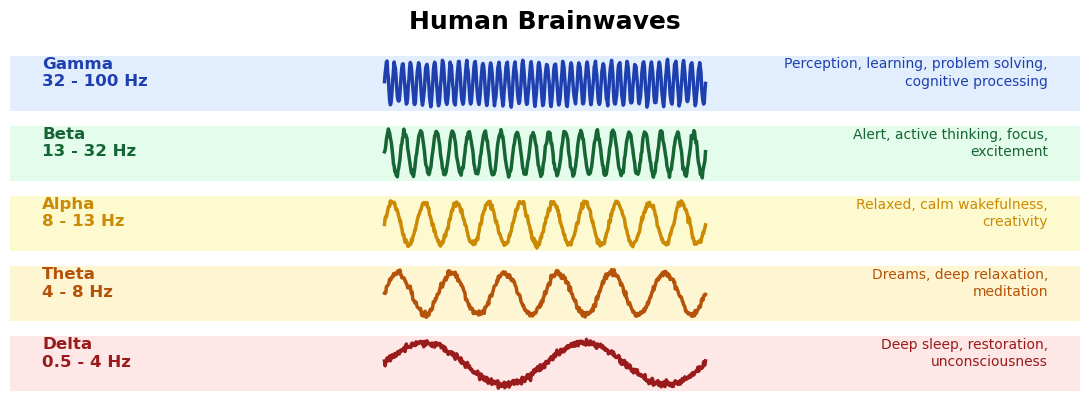

In [ ]:
## FIGURE 1. Overview of the main human EEG frequency bands

bands = [
    {
        "name": "Gamma",
        "range": "32 - 100 Hz",
        "color": "#dbeafe",
        "linecolor": "#1e40af",
        "desc": "Perception, learning, problem solving,\ncognitive processing",
        "freq": 40
    },
    {
        "name": "Beta",
        "range": "13 - 32 Hz",
        "color": "#dcfce7",
        "linecolor": "#166534",
        "desc": "Alert, active thinking, focus,\nexcitement",
        "freq": 20
    },
    {
        "name": "Alpha",
        "range": "8 - 13 Hz",
        "color": "#fef9c3",
        "linecolor": "#ca8a04",
        "desc": "Relaxed, calm wakefulness,\ncreativity",
        "freq": 10
    },
    {
        "name": "Theta",
        "range": "4 - 8 Hz",
        "color": "#fef3c7",
        "linecolor": "#b45309",
        "desc": "Dreams, deep relaxation,\nmeditation",
        "freq": 6
    },
    {
        "name": "Delta",
        "range": "0.5 - 4 Hz",
        "color": "#fee2e2",
        "linecolor": "#991b1b",
        "desc": "Deep sleep, restoration,\nunconsciousness",
        "freq": 2
    }
]

fig, axes = plt.subplots(len(bands), 1, figsize=(11, 4.2), sharex=True)
plt.subplots_adjust(hspace=0.3)

# Parameters for spacing
left_text_x = 0.03
right_text_x = 0.97
wave_left = 0.35
wave_right = 0.65

for i, band in enumerate(bands):
    ax = axes[i]
    # Background with rounded corners
    bbox = FancyBboxPatch(
        (0, -1.2), 1, 2.4,
        boxstyle="round,pad=0.04,rounding_size=0.08",
        linewidth=0, facecolor=band["color"], alpha=0.8, zorder=0, transform=ax.transAxes
    )
    ax.add_patch(bbox)
    # Wave only in the middle (between wave_left and wave_right)
    t_wave = np.linspace(0, 1, 500)
    x_wave = np.linspace(wave_left, wave_right, 500)
    wave = np.sin(2 * np.pi * band["freq"] * t_wave)
    noise = np.random.normal(0, 0.08, len(t_wave))
    ax.plot(x_wave, wave + noise, color=band["linecolor"], lw=2.5, zorder=2, clip_on=False)
    # Text left (in the bar, not over the wave)
    ax.text(left_text_x, 0.7, f"{band['name']}\n{band['range']}", va='center', ha='left',
            fontsize=12, fontweight='bold', color=band["linecolor"], transform=ax.transAxes, family='DejaVu Sans')
    # Text right (in the bar, with loop back)
    ax.text(right_text_x, 0.7, band["desc"], va='center', ha='right', fontsize=10, color=band["linecolor"],
            wrap=True, transform=ax.transAxes, family='DejaVu Sans', linespacing=1.3)
    # Settings
    ax.set_yticks([])
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=False, labelbottom=False)

axes[0].set_title("Human Brainwaves", fontsize=18, pad=20, fontweight='bold', family='DejaVu Sans')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

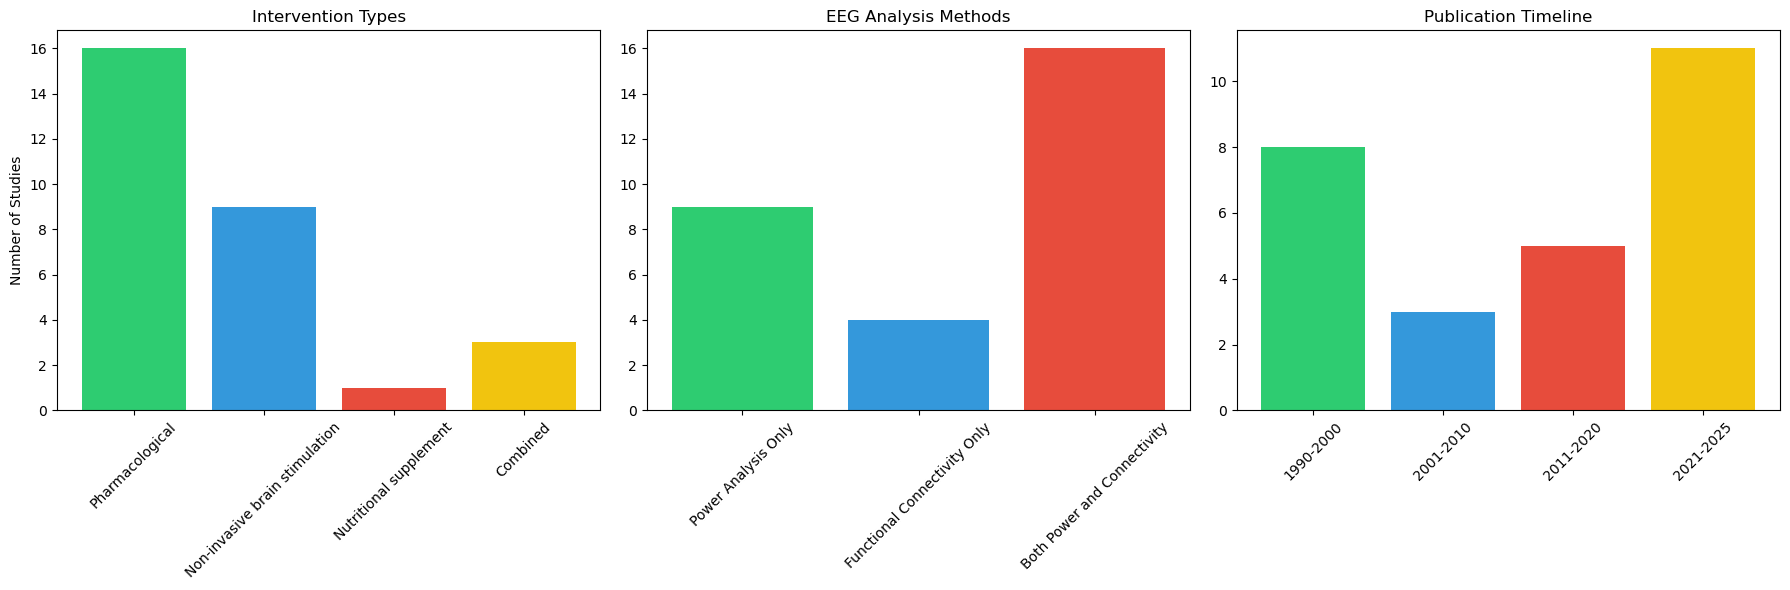

In [78]:
## FIGURE 2. Overview of study characteristics across included studies

# Create DataFrame with intervention types and publication years
data = {
    'Study': [
        'Knott et al. (2000)', 'Scheltens et al. (2018)', 'Benussi et al. (2022)',
        'Andrade et al. (2022)', 'Gangemi et al. (2021)', 'Vecchio et al. (2022)',
        'Briels et al. (2020)', 'Scheltens et al. (2012)', 'Babiloni et al. (2006)',
        'de Waal et al. (2014)', 'Mohr et al. (1995)', 'Saletu et al. (1992)',
        'Grossmann et al. (1990)', 'Alvarez et al. (1999)', 'Almkvist et al. (2001)',
        'Saletu et al. (1995)', 'Hoy et al. (2023)', 'Heiss et al. (1994)',
        'Engel et al. (1992)', 'Minthon et al. (1993)', 'Babiloni et al. (2009)',
        'Koch et al. (2018)', 'Cheng et al. (2024)', 'Navid et al. (2024)',
        'Koch et al. (2025)', 'Lin et al. (2024)', 'Tang et al. (2024)',
        'Prins et al. (2024)', 'Vijverberg et al. (2024)'
    ],
    'Intervention_Type': [
        'Pharmacological', 'Pharmacological', 'Non-invasive brain stimulation',
        'Pharmacological', 'Pharmacological', 'Non-invasive brain stimulation',
        'Non-invasive brain stimulation', 'Pharmacological', 'Pharmacological',
        'Non-invasive brain stimulation', 'Pharmacological', 'Pharmacological',
        'Pharmacological', 'Pharmacological', 'Pharmacological',
        'Pharmacological', 'Non-invasive brain stimulation', 'Pharmacological',
        'Pharmacological', 'Pharmacological', 'Pharmacological',
        'Non-invasive brain stimulation', 'Combined', 'Combined',
        'Non-invasive brain stimulation', 'Combined', 'Non-invasive brain stimulation',
        'Non-invasive brain stimulation', 'Nutritional supplement'
    ],
    'EEG_Analysis': [
        'Power Analysis Only', 'Both Power and Connectivity', 'Both Power and Connectivity',
        'Both Power and Connectivity', 'Power Analysis Only', 'Functional Connectivity Only',
        'Functional Connectivity Only', 'Both Power and Connectivity', 'Both Power and Connectivity',
        'Both Power and Connectivity', 'Both Power and Connectivity', 'Both Power and Connectivity',
        'Power Analysis Only', 'Both Power and Connectivity', 'Power Analysis Only',
        'Both Power and Connectivity', 'Functional Connectivity Only', 'Power Analysis Only',
        'Power Analysis Only', 'Power Analysis Only', 'Power Analysis Only',
        'Both Power and Connectivity', 'Functional Connectivity Only', 'Both Power and Connectivity',
        'Both Power and Connectivity', 'Both Power and Connectivity', 'Both Power and Connectivity',
        'Both Power and Connectivity', 'Power Analysis Only'
    ]
}

df = pd.DataFrame(data)

# Extract years and create time periods
df['Year'] = df['Study'].str.extract(r'\((\d{4})\)').astype(int)
df['Time_Period'] = pd.cut(df['Year'], 
                          bins=[1990, 2000, 2010, 2020, 2024],
                          labels=['1990-2000', '2001-2010', '2011-2020', '2021-2025'])

# Count intervention types and reorder
intervention_counts = df['Intervention_Type'].value_counts()
intervention_counts = intervention_counts.reindex(['Pharmacological', 'Non-invasive brain stimulation', 
                                                 'Nutritional supplement', 'Combined'])

# Count EEG analysis methods
eeg_counts = df['EEG_Analysis'].value_counts()
eeg_counts = eeg_counts.reindex(['Power Analysis Only', 'Functional Connectivity Only', 
                                'Both Power and Connectivity'])

time_period_counts = df['Time_Period'].value_counts().sort_index()


# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Intervention Types
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
ax1.bar(intervention_counts.index, intervention_counts.values, color=colors)
ax1.set_title('Intervention Types')
ax1.set_ylabel('Number of Studies')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: EEG Analysis Methods
ax2.bar(eeg_counts.index, eeg_counts.values, color=colors[:3])
ax2.set_title('EEG Analysis Methods')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Time Periods
ax3.bar(time_period_counts.index, time_period_counts.values, color=colors[:4])
ax3.set_title('Publication Timeline')
ax3.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('study_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
## FIGURE 3. Sunburst diagrams showing the effects of different interventions on EEG frequency bands in Alzheimer's disease

# Load data
df = pd.read_csv('studies_long_format.csv')

# Effect labels
effect_map = {1: 'Increase', 0: 'No Change', -1: 'Decrease'}
df['Effect_Label'] = df['Effect'].map(effect_map)

# CASP colour
def casp_color(casp):
    if casp >= 9:
        return 'green'  # High quality
    elif 7 <= casp <= 8.5:
        return 'orange'  # Moderate quality
    elif casp <= 6.5:
        return 'red'  # Low quality

# Intervention groups
def group_intervention(row):
    if 'rTMS' in row['Intervention']:
        return 'rTMS'
    elif 'tDCS' in row['Intervention']:
        return 'tDCS'
    else:
        return row['Intervention']
df['Intervention_Group'] = df.apply(group_intervention, axis=1)

def plot_sunburst(intervention_type, group_col='Intervention'):
    dff = df[df['Intervention_Type'] == intervention_type].copy()
    if intervention_type == 'Brain Stimulation':
        group_col = 'Intervention_Group'

    # Group so that each segment is unique
    grouped = dff.groupby([group_col, 'Frequency_Band', 'Effect_Label']).agg({
        'Study': lambda x: ', '.join(x),
        'CASP': lambda x: ', '.join(str(i) for i in x)
    }).reset_index()

    # For the colour: take the lowest CASP score of the studies in the segment
    grouped['CASP_num'] = grouped['CASP'].apply(lambda x: min([float(i) for i in x.split(', ')]))
    grouped['CASP_Color'] = grouped['CASP_num'].apply(casp_color)

    fig = px.sunburst(
        grouped,
        path=[group_col, 'Frequency_Band', 'Effect_Label'],
        color='CASP_Color',
        color_discrete_map={'green': '#6FCF97', 'orange': '#F2C94C', 'red': '#EB5757', 'gray': '#BDBDBD'},
        hover_data={'Study': True, 'CASP': True, group_col: True, 'Frequency_Band': True, 'Effect_Label': True, 'CASP_Color': False},
        title=f"EEG Effects of {intervention_type} Interventions"
    )

    # Determine which ids belong to the outer ring (effect level)
    ids = fig.data[0]['ids']
    labels = fig.data[0]['labels']
    parents = fig.data[0]['parents']

    parent_counts = Counter(parents)
    outer_ring_indices = [i for i, id_ in enumerate(ids) if id_ not in parent_counts]

    # Make mapping: id --> casp colour
    id_color_map = {}
    for i, row in grouped.iterrows():
        id_string = f"{row[group_col]}/{row['Frequency_Band']}/{row['Effect_Label']}"
        id_color_map[id_string] = {'green': '#6FCF97', 'orange': '#F2C94C', 'red': '#EB5757'}[row['CASP_Color']]

    colors = ['#BDBDBD'] * len(ids)

    # Colour only the outer ring correctly
    for idx in outer_ring_indices:
        id_string = ids[idx]
        if id_string in id_color_map:
            colors[idx] = id_color_map[id_string]

    fig.update_traces(
        marker=dict(colors=colors),
        insidetextorientation='radial'
    )

    fig.update_layout(width=1100, height=1100)
    fig.show()

# Plot for Medication
plot_sunburst('Medication', group_col='Intervention')

# Plot for Brain Stimulation
plot_sunburst('Brain Stimulation', group_col='Intervention_Group')


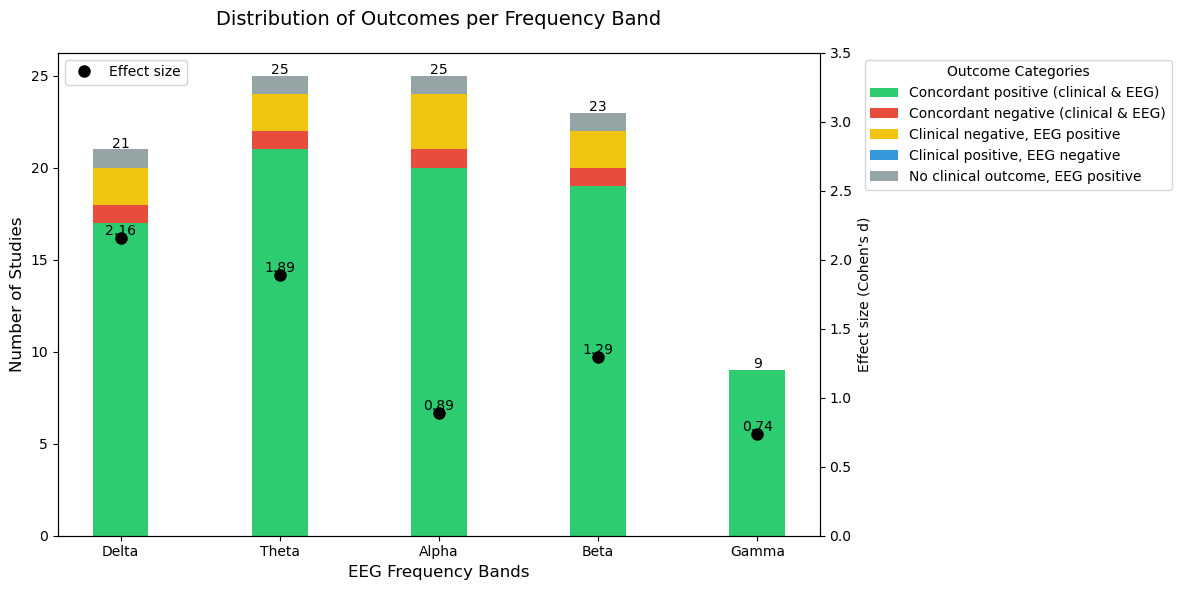

In [ ]:
## FIGURE 4. Concordance between clinical and EEG outcomes across included studies

# Average effect size per band
effect_sizes = {
    'Delta': np.mean([1.59, -0.65, 1.05, 3.9, 4.9]),  # Knott, Vecchio, Alvarez, Saletu SDAT, Saletu MID
    'Theta': np.mean([3.62, 0.93, 1.12]),             # Knott, Gangemi, Alvarez
    'Alpha': np.mean([3.18, 0.88, 0.36, -0.86, 0.87]), # Knott, Gangemi, Vecchio (alpha1/2), Alvarez
    'Beta': np.mean([2.46, 0.91, 0.51]),              # Knott, Gangemi, de Waal
    'Gamma': np.mean([1.05, 0.724, 0.524, 0.664])     # Hoy, Benussi (rs^2 omgezet), alleen als je deze wilt tonen
}

df = pd.DataFrame(studies)

outcomes = ['Plus_Plus', 'Min_Min', 'Min_Plus', 'Plus_Min', 'Unknown_Plus']
colors = {
    'Plus_Plus': '#2ecc71',    # Green
    'Min_Min': '#e74c3c',      # Red
    'Min_Plus': '#f1c40f',     # Yellow
    'Plus_Min': '#3498db',     # Blue
    'Unknown_Plus': '#95a5a6'  # Gray
}

bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
r1 = np.arange(len(bands))
band_outcomes = {band: {outcome: 0 for outcome in outcomes} for band in bands}

for _, study in df.iterrows():
    outcome = study_outcomes[study['Study']]
    for band in bands:
        if band in study['Bands']:
            band_outcomes[band][outcome] += 1

fig, ax = plt.subplots(figsize=(12, 6))
barWidth = 0.35
bottom = np.zeros(len(bands))
for outcome in outcomes:
    counts = [band_outcomes[band][outcome] for band in bands]
    ax.bar(r1, counts, width=barWidth, color=colors[outcome], label=outcome, bottom=bottom)
    bottom += counts

legend_labels = {
    'Plus_Plus': 'Concordant positive (clinical & EEG)',
    'Min_Min': 'Concordant negative (clinical & EEG)',
    'Min_Plus': 'Clinical negative, EEG positive',
    'Plus_Min': 'Clinical positive, EEG negative',
    'Unknown_Plus': 'No clinical outcome, EEG positive'
}

# Add count labels on top of bars
for i, band in enumerate(bands):
    total = sum(band_outcomes[band].values())
    if total > 0:
        ax.text(i, total + 0.1, str(total), ha='center')

ax.set_xlabel('EEG Frequency Bands', fontsize=12)
ax.set_ylabel('Number of Studies', fontsize=12)
ax.set_xticks(r1)
ax.set_xticklabels(bands)
plt.title('Distribution of Outcomes per Frequency Band', fontsize=14, pad=20)

# Legend with clear labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels.get(l, l) for l in labels]
ax.legend(handles, new_labels, title='Outcome Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Effect size as black dots (second y-axis)
ax2 = ax.twinx()
effect_size_values = [effect_sizes.get(band) for band in bands]
for i, es in enumerate(effect_size_values):
    if es is not None and not np.isnan(es):
        ax2.plot(i, es, 'ko', label='Effect size' if i == 0 else "", markersize=8)
        ax2.text(i, es, f"{es:.2f}", ha='center', va='bottom', color='k', fontsize=10)
ax2.set_ylabel("Effect size (Cohen's d)")
if any(es is not None and not np.isnan(es) for es in effect_size_values):
    max_es = max([es for es in effect_size_values if es is not None and not np.isnan(es)])
    ax2.set_ylim(0, 3.5)
else:
    ax2.set_ylim(0, 1)

# Effect size legend
handles2, labels2 = ax2.get_legend_handles_labels()
if handles2:
    ax2.legend(handles2, ['Effect size'], loc='upper left')

plt.tight_layout()
plt.show()